In [79]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import * 

In [80]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [81]:
T = 10000
h0 = 0.01

In [82]:
FR_traj1 = run_adaptive(PEFRLStep, 0, T, h0, r0s, v0s, G, masses, 0.6)
# Leapfrog_traj1 = run_adaptive(LeapfrogStep, 0, T, h0, r0s, v0s, G, masses, 0.15)

In [83]:
print(FR_traj1[-1])

6.2960991859436035


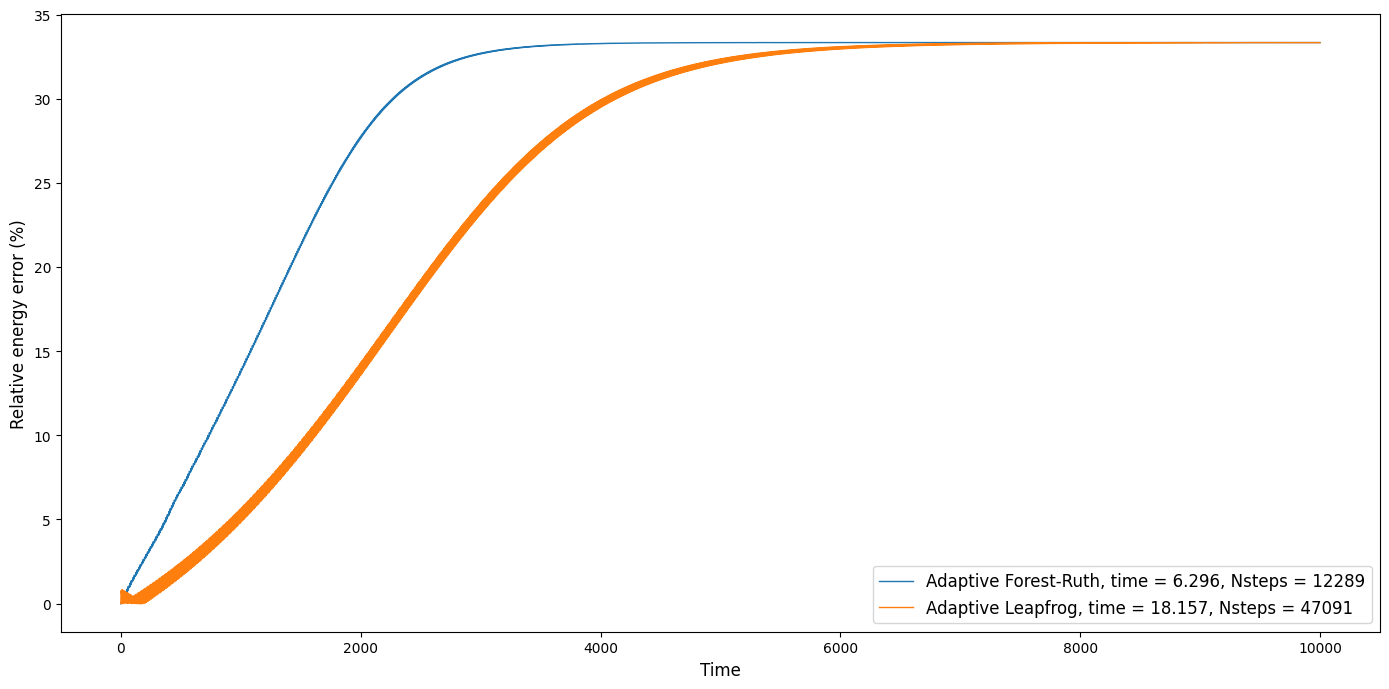

In [121]:
fig, ax = plt.subplots(1,1,figsize= (14,7))

FR_E1 = RelativeEnergy(FR_traj1[3])
Leapfrog_E1 = RelativeEnergy(Leapfrog_traj1[3])

ax.plot(FR_traj1[0], FR_E1, label = f'Adaptive Forest-Ruth, time = {np.round(FR_traj1[-1], 3)}, Nsteps = {len(FR_traj1[1])}', linewidth = 1)
ax.plot(Leapfrog_traj1[0], Leapfrog_E1, label = f'Adaptive Leapfrog, time = {np.round(Leapfrog_traj1[-1], 3)}, Nsteps = {len(Leapfrog_traj1[1])}', linewidth = 1)
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative energy error (%)', fontsize = 12)
ax.legend(fontsize = 12)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Non-sym Long-term Analysis.pdf', format = 'pdf')

In [85]:
FR_traj = run_adaptive_symplectic(PEFRLStep, 0, T, h0, r0s, v0s, G, masses, 0.6)
# Leapfrog_traj = run_adaptive_symplectic(LeapfrogStep, 0, T, h0, r0s, v0s, G, masses, 0.15)

In [93]:
print(FR_traj[-1])
print(len(FR_traj[1]))

8.156797885894775
8922


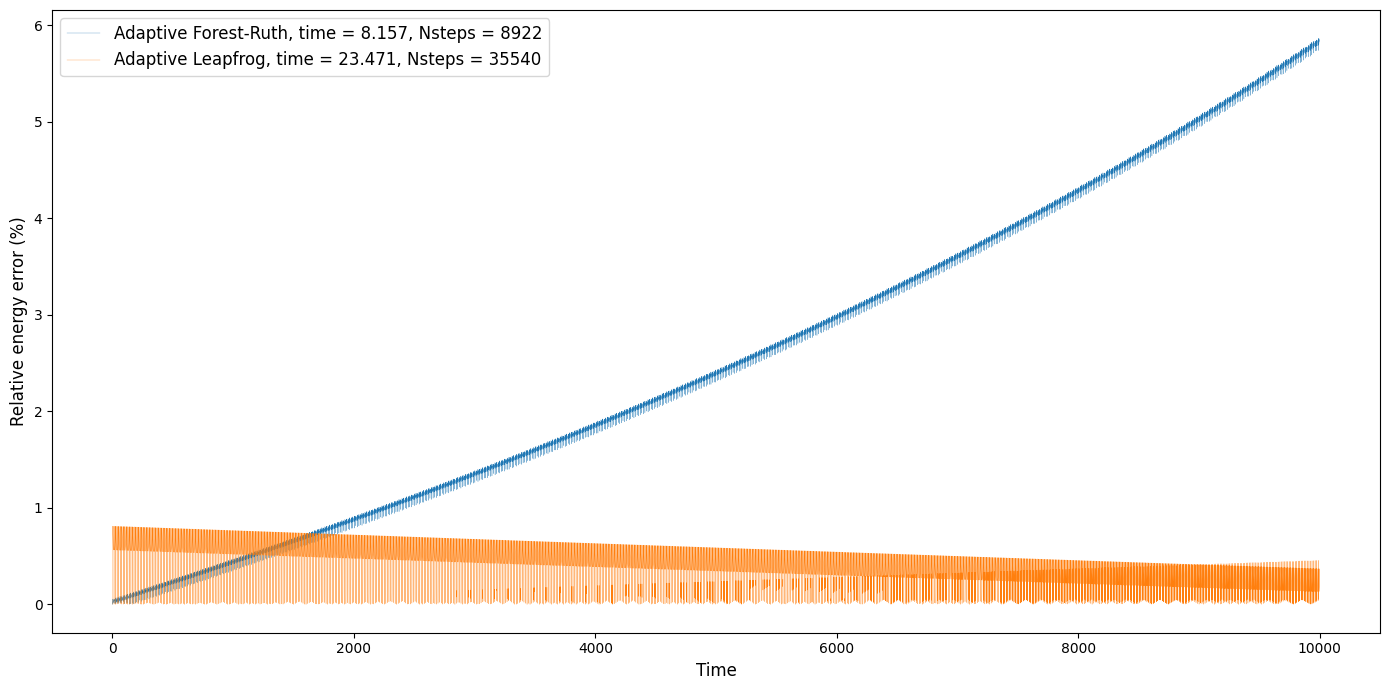

In [96]:
fig, ax = plt.subplots(1,1,figsize= (14,7))

FR_E = RelativeEnergy(FR_traj[3])
Leapfrog_E = RelativeEnergy(Leapfrog_traj[3])

ax.plot(FR_traj[0], FR_E, label = f'Adaptive Forest-Ruth, time = {np.round(FR_traj[-1], 3)}, Nsteps = {len(FR_traj[1])}', linewidth = .2)
ax.plot(Leapfrog_traj[0], Leapfrog_E, label = f'Adaptive Leapfrog, time = {np.round(Leapfrog_traj[-1], 3)}, Nsteps = {len(Leapfrog_traj[1])}', linewidth = .2)
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative energy error (%)', fontsize = 12)
ax.legend(fontsize = 12)
plt.tight_layout()

In [109]:
FR_traj3 = run_adaptive_symplectic(PEFRLStep, 0, T, h0, r0s, v0s, G, masses, 0.475)
# Leapfrog_traj3 = run_adaptive_symplectic(LeapfrogStep, 0, T, h0, r0s, v0s, G, masses, 0.15)

In [92]:
print(len(FR_traj3[1]))

11458


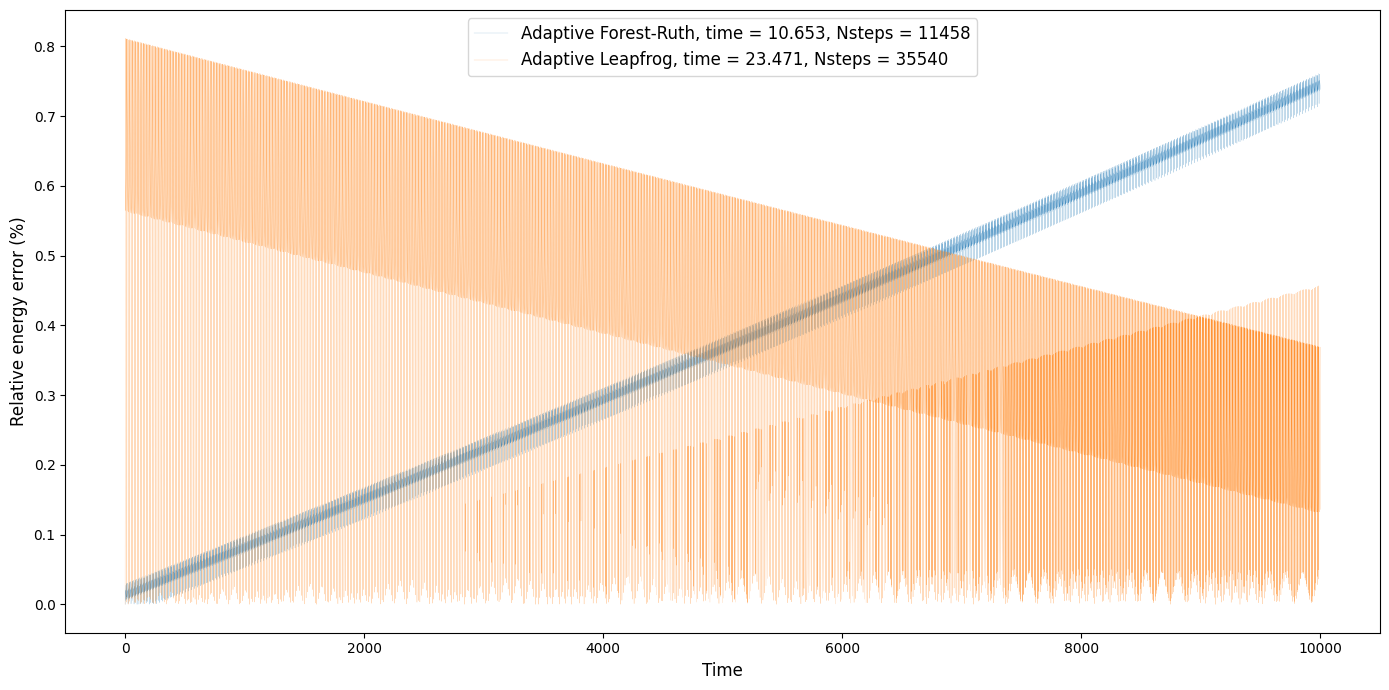

In [122]:
fig, ax = plt.subplots(1,1,figsize= (14,7))

FR_E3 = RelativeEnergy(FR_traj3[3])
Leapfrog_E3 = RelativeEnergy(Leapfrog_traj3[3])

ax.plot(FR_traj3[0], FR_E3, label = f'Adaptive Forest-Ruth, time = {np.round(FR_traj3[-1], 3)}, Nsteps = {len(FR_traj3[1])}', linewidth = .1)
ax.plot(Leapfrog_traj3[0], Leapfrog_E3, label = f'Adaptive Leapfrog, time = {np.round(Leapfrog_traj3[-1], 3)}, Nsteps = {len(Leapfrog_traj[1])}', linewidth = .1)
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative energy error (%)', fontsize = 12)
ax.legend(fontsize = 12)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Sym Long-term Analysis.pdf', format = 'pdf')

In [115]:
FR_traj4 = run_adaptive_symplectic(PEFRLStep, 0, 500, h0, r0s, v0s, G, masses, 0.475)
Leapfrog_traj4 = run_adaptive_symplectic(LeapfrogStep, 0, 500, h0, r0s, v0s, G, masses, 0.15)

orig_FR_traj4 = run_adaptive(PEFRLStep, 0, 500, h0, r0s, v0s, G, masses, 0.475)
orig_Leapfrog_traj4 = run_adaptive(LeapfrogStep, 0, 500, h0, r0s, v0s, G, masses, 0.15)

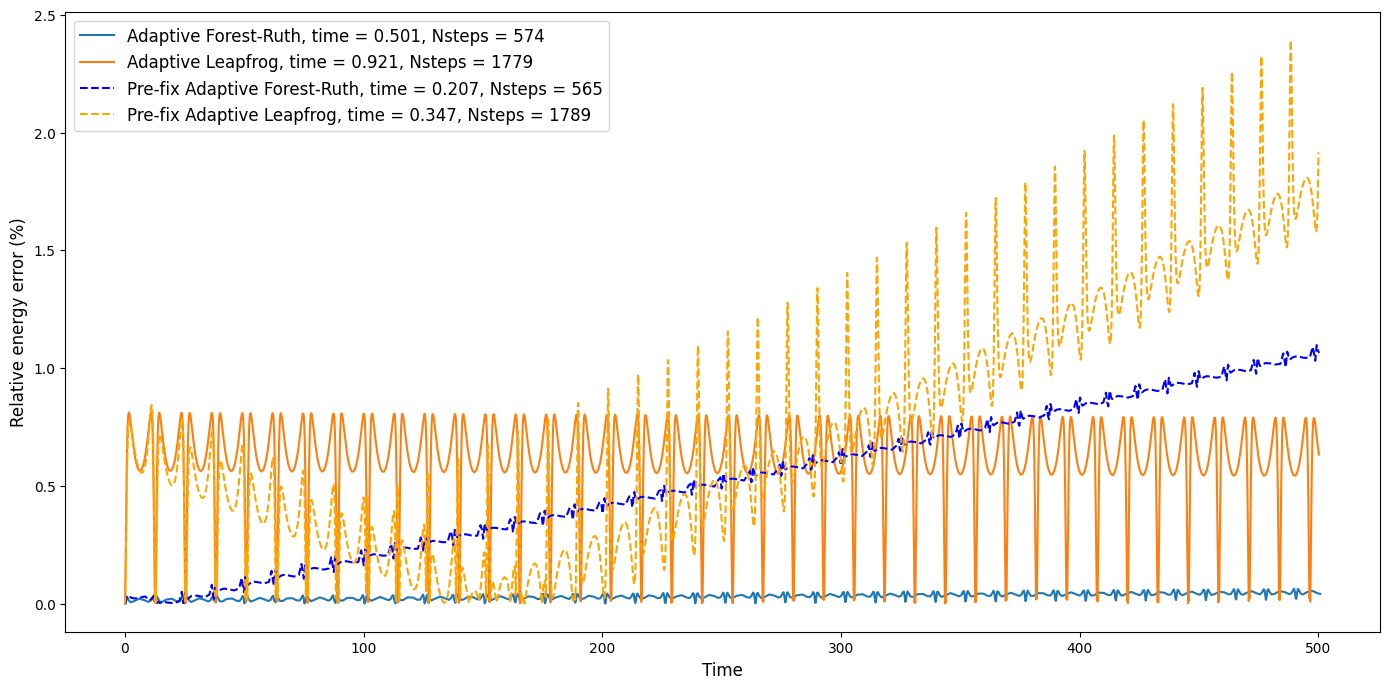

In [123]:
fig, ax = plt.subplots(1,1,figsize= (14,7))

FR_E4 = RelativeEnergy(FR_traj4[3])
Leapfrog_E4 = RelativeEnergy(Leapfrog_traj4[3])
orig_FR_E4 = RelativeEnergy(orig_FR_traj4[3])
orig_Leapfrog_E4 = RelativeEnergy(orig_Leapfrog_traj4[3])

ax.plot(FR_traj4[0], FR_E4, label = f'Adaptive Forest-Ruth, time = {np.round(FR_traj4[-1], 3)}, Nsteps = {len(FR_traj4[1])}')
ax.plot(Leapfrog_traj4[0], Leapfrog_E4, label = f'Adaptive Leapfrog, time = {np.round(Leapfrog_traj4[-1], 3)}, Nsteps = {len(Leapfrog_traj4[1])}')
ax.plot(orig_FR_traj4[0], orig_FR_E4, label = f'Pre-fix Adaptive Forest-Ruth, time = {np.round(orig_FR_traj4[-1], 3)}, Nsteps = {len(orig_FR_traj4[1])}', linestyle = 'dashed', color = 'blue')
ax.plot(orig_Leapfrog_traj4[0], orig_Leapfrog_E4, label = f'Pre-fix Adaptive Leapfrog, time = {np.round(orig_Leapfrog_traj4[-1], 3)}, Nsteps = {len(orig_Leapfrog_traj4[1])}', linestyle = 'dashed', color = 'orange')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative energy error (%)', fontsize = 12)
ax.legend(fontsize = 12)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Compare Long-term Analysis.pdf', format = 'pdf')